In [1]:
import json
import torch
import os
import numpy as np
import torch
import torch.multiprocessing as mp
import torch
from torch.utils.data import DataLoader
%matplotlib inline
import matplotlib.pyplot as plt
from dnaDataloader import expermentDataloader
from dnaDataloader import addData
from dnaModelUtil import test
from dnaModelUtil import printStats
from IPython.core.interactiveshell import InteractiveShell
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
cpu = torch.device("cpu")
batch_size = 25
device

device(type='cuda', index=1)

In [2]:
try:
   mp.set_start_method('spawn')
except RuntimeError:
   pass # throws error if run twice without resetting the kernal, if its already set we dont care that this errors

In [3]:
with open("./Models/smallTrain/results.json", 'r') as file:
    results = file.read()
results = json.loads(results)
results

{'1800_nM_AR_out': {'path': './Models/smallTrain/1800_nM_AR_out.pt',
  'acc': 0.54},
 '800_nM_AR_out': {'path': './Models/smallTrain/800_nM_AR_out.pt',
  'acc': 0.37000000000000005},
 '1200_nM_AR_out': {'path': './Models/smallTrain/1200_nM_AR_out.pt',
  'acc': 0.53},
 '400_nM_AR_out': {'path': './Models/smallTrain/400_nM_AR_out.pt',
  'acc': 0.43000000000000005},
 '50_nM_AR_out': {'path': './Models/smallTrain/50_nM_AR_out.pt',
  'acc': 0.8500000000000001},
 '100_nM_AR_out': {'path': './Models/smallTrain/100_nM_AR_out.pt',
  'acc': 0.52}}

In [4]:
folders = [d[0] for d in os.walk("/home/khood/GitHub/SNN-DNA-project/Prepocessing/sorted")][1:] # remove first one is it is "/home/khood/GitHub/SNN-DNA-project/Prepocessing/sorted"
len(folders)

6

In [5]:
datasets = []
featIn = 0
for d in folders:
    data = expermentDataloader(
        f"{d}/index.csv",
        f"{d}", 
    )
    rawData = [d for d in data]
    featIn = len(rawData[0][0])
    trainValidData = []
    testData = []
    addData(testData, trainValidData, rawData, rhsSize=300)


    np.random.shuffle(trainValidData)
    trainData = []
    validData = []
    addData(trainData, validData, trainValidData, rhsSize=int(len(trainValidData)*(1/3)))

    datasets.append({"name": f"{os.path.basename(d)}", 
                     "train":DataLoader(trainData, batch_size=batch_size, shuffle=True) , 
                     "valid":DataLoader(validData, batch_size=batch_size, shuffle=True) , 
                     "test":DataLoader(testData, batch_size=len(testData), shuffle=True) ,
                     "model": {}}
                    )

In [6]:
for d in datasets:
    print(f"-- {d['name']} --")
    print(f"train: {len(d['train'])}")
    print(f"valid: {len(d['valid'])}")
    print(f"test : {len(d['test'])}")

-- 1800_nM_AR_out --
train: 8
valid: 4
test : 1
-- 800_nM_AR_out --
train: 8
valid: 4
test : 1
-- 1200_nM_AR_out --
train: 8
valid: 4
test : 1
-- 400_nM_AR_out --
train: 8
valid: 4
test : 1
-- 50_nM_AR_out --
train: 8
valid: 4
test : 1
-- 100_nM_AR_out --
train: 8
valid: 4
test : 1


In [7]:
manager = mp.Manager()
return_dict = manager.dict()

In [8]:
processes = []
devices = [torch.device("cuda:0"),torch.device("cuda:1"),torch.device("cuda:2"),torch.device("cuda:3")]
epochs = 1
error_margin = 20
for d in datasets:
    processes.append(mp.Process(target=test, args=(d["test"], results[d["name"]]["path"], d["name"], featIn, return_dict, epochs, error_margin, devices[0])))
    devices.append(devices.pop(0))
    
processes

[<Process name='Process-2' parent=1686479 initial>,
 <Process name='Process-3' parent=1686479 initial>,
 <Process name='Process-4' parent=1686479 initial>,
 <Process name='Process-5' parent=1686479 initial>,
 <Process name='Process-6' parent=1686479 initial>,
 <Process name='Process-7' parent=1686479 initial>]

In [9]:
print(f"{return_dict}")

{}


In [10]:
processesList = list(range(len(processes)))

while processesList:
    run = processesList[:4]
    processesList = processesList[4:]
    for i in run:
        processes[i].start()
    for i in run:
        processes[i].join()
        processes[i].terminate()
print(return_dict)

test 1800_nM_AR_out on cuda:0...
test 800_nM_AR_out on cuda:1...
test 1200_nM_AR_out on cuda:2...
test 400_nM_AR_out on cuda:3...
test 50_nM_AR_out on cuda:0...
test 100_nM_AR_out on cuda:1...
{'1800_nM_AR_out': {'outputPlot': array([[ 53.879982],
       [ 42.699387],
       [ 55.988853],
       [ 42.699387],
       [ 42.699387],
       [ 42.699387],
       [ 46.23855 ],
       [ 47.29015 ],
       [ 49.032967],
       [ 42.699387],
       [ 49.981106],
       [101.04382 ],
       [ 52.55497 ],
       [ 42.699387],
       [ 42.699387],
       [ 57.40583 ],
       [ 45.485657],
       [ 42.699387],
       [ 42.699387],
       [ 46.80713 ],
       [ 46.484314],
       [ 44.053127],
       [ 42.699387],
       [ 39.870377],
       [ 63.919697],
       [ 58.8936  ],
       [ 93.80864 ],
       [124.87526 ],
       [ 70.1475  ],
       [ 62.003044],
       [105.760345],
       [ 42.699387],
       [ 49.362736],
       [ 47.912548],
       [ 44.88952 ],
       [ 49.879486],
       [159.05733

In [11]:
print(f"{return_dict}")

{'1800_nM_AR_out': {'outputPlot': array([[ 53.879982],
       [ 42.699387],
       [ 55.988853],
       [ 42.699387],
       [ 42.699387],
       [ 42.699387],
       [ 46.23855 ],
       [ 47.29015 ],
       [ 49.032967],
       [ 42.699387],
       [ 49.981106],
       [101.04382 ],
       [ 52.55497 ],
       [ 42.699387],
       [ 42.699387],
       [ 57.40583 ],
       [ 45.485657],
       [ 42.699387],
       [ 42.699387],
       [ 46.80713 ],
       [ 46.484314],
       [ 44.053127],
       [ 42.699387],
       [ 39.870377],
       [ 63.919697],
       [ 58.8936  ],
       [ 93.80864 ],
       [124.87526 ],
       [ 70.1475  ],
       [ 62.003044],
       [105.760345],
       [ 42.699387],
       [ 49.362736],
       [ 47.912548],
       [ 44.88952 ],
       [ 49.879486],
       [159.05733 ],
       [ 49.129494],
       [ 50.32289 ],
       [ 68.62303 ],
       [ 47.680412],
       [ 56.275124],
       [155.39801 ],
       [ 55.952667],
       [ 42.699387],
       [ 44.057236],


In [12]:
len(return_dict["1800_nM_AR_out"]["outputPlot"])
len(return_dict["1800_nM_AR_out"]["targetPlot"])

588

In [13]:
defultePlotSize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 5]

In [14]:
return_dict.keys()

['1800_nM_AR_out',
 '800_nM_AR_out',
 '1200_nM_AR_out',
 '400_nM_AR_out',
 '50_nM_AR_out',
 '100_nM_AR_out']

+------------------
| total number of experments: 588
| min: 0.00304412841796875
| max: 246.39273071289062
| average: 30.807315826416016
| median: 11.839958190917969
| mode: ModeResult(mode=array([2.6993866], dtype=float32), count=array([9]))
| average difference: 41.24667686495382
+------------------


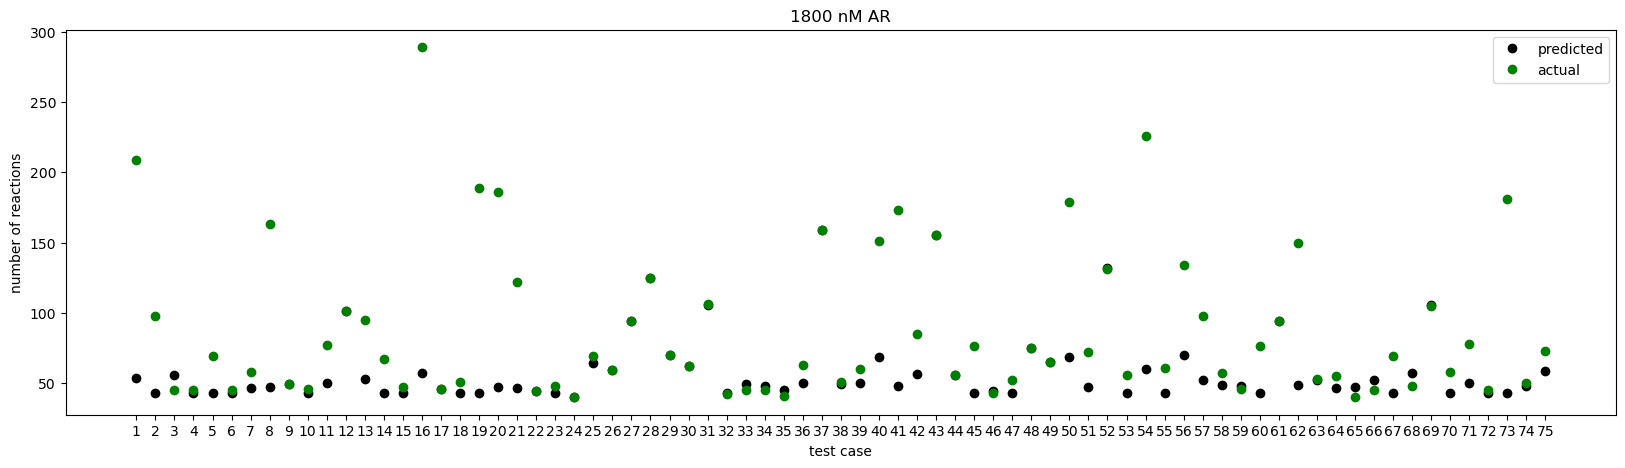

+------------------
| total number of experments: 264
| min: 0.0003509521484375
| max: 182.88372802734375
| average: 23.341201782226562
| median: 6.239154815673828
| mode: ModeResult(mode=array([4.813793], dtype=float32), count=array([5]))
| average difference: 33.13114990206245
+------------------


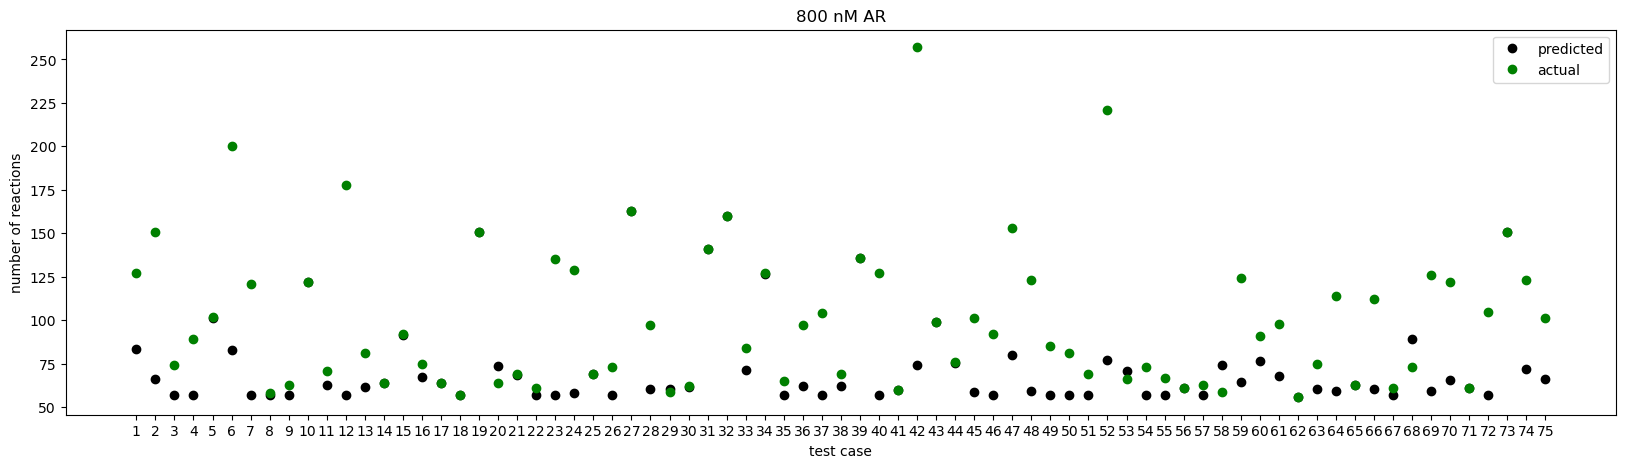

+------------------
| total number of experments: 494
| min: 0.00028228759765625
| max: 254.26141357421875
| average: 27.721616744995117
| median: 8.130573272705078
| mode: ModeResult(mode=array([7.2612076], dtype=float32), count=array([11]))
| average difference: 38.3645613487612
+------------------


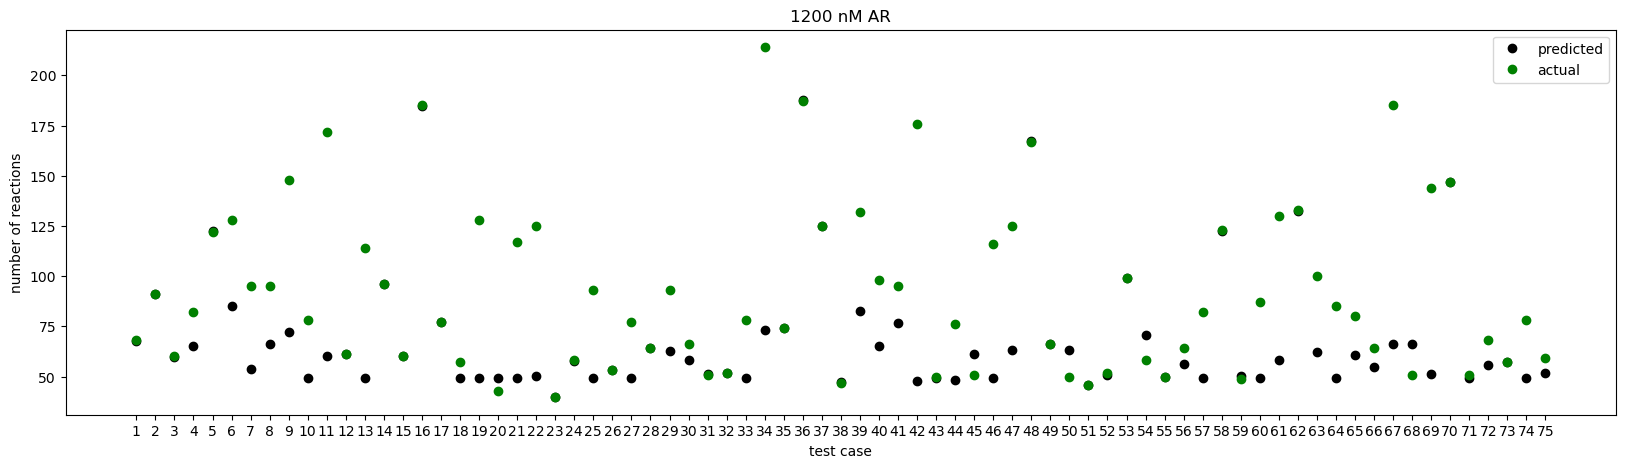

+------------------
| total number of experments: 177
| min: 0.002277374267578125
| max: 207.77601623535156
| average: 23.09912109375
| median: 3.8773536682128906
| mode: ModeResult(mode=array([4.0724525], dtype=float32), count=array([3]))
| average difference: 33.588032068567024
+------------------


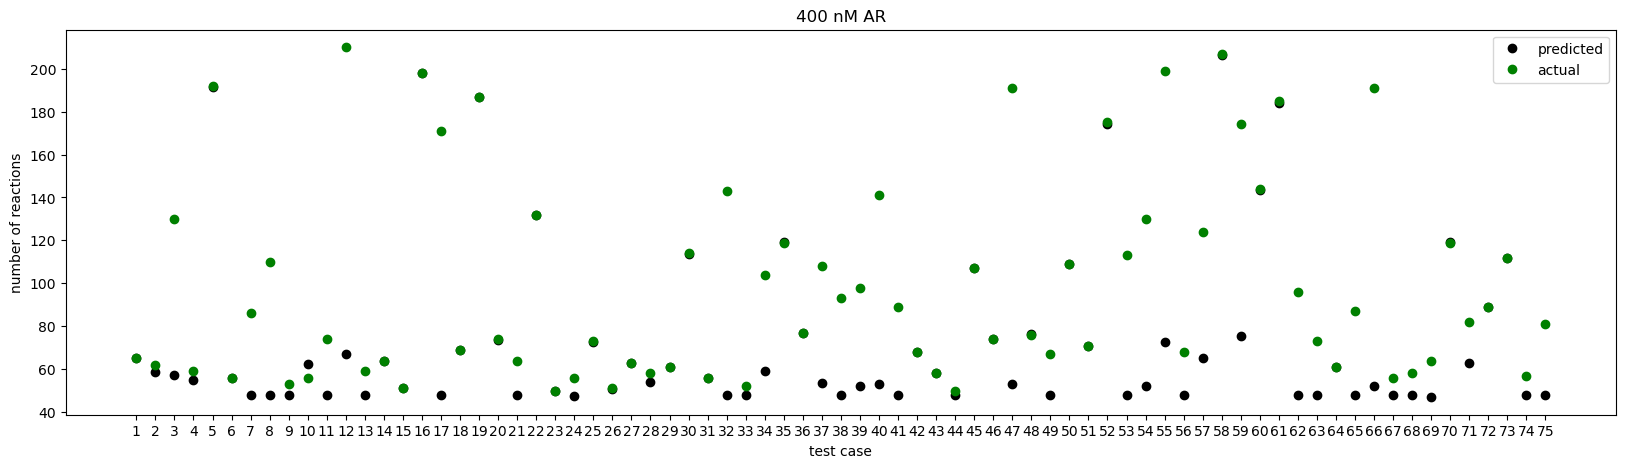

+------------------
| total number of experments: 340
| min: 0.003185272216796875
| max: 278.11492919921875
| average: 10.05695629119873
| median: 4.210475921630859
| mode: ModeResult(mode=array([3.2967873], dtype=float32), count=array([9]))
| average difference: 14.403982300884955
+------------------


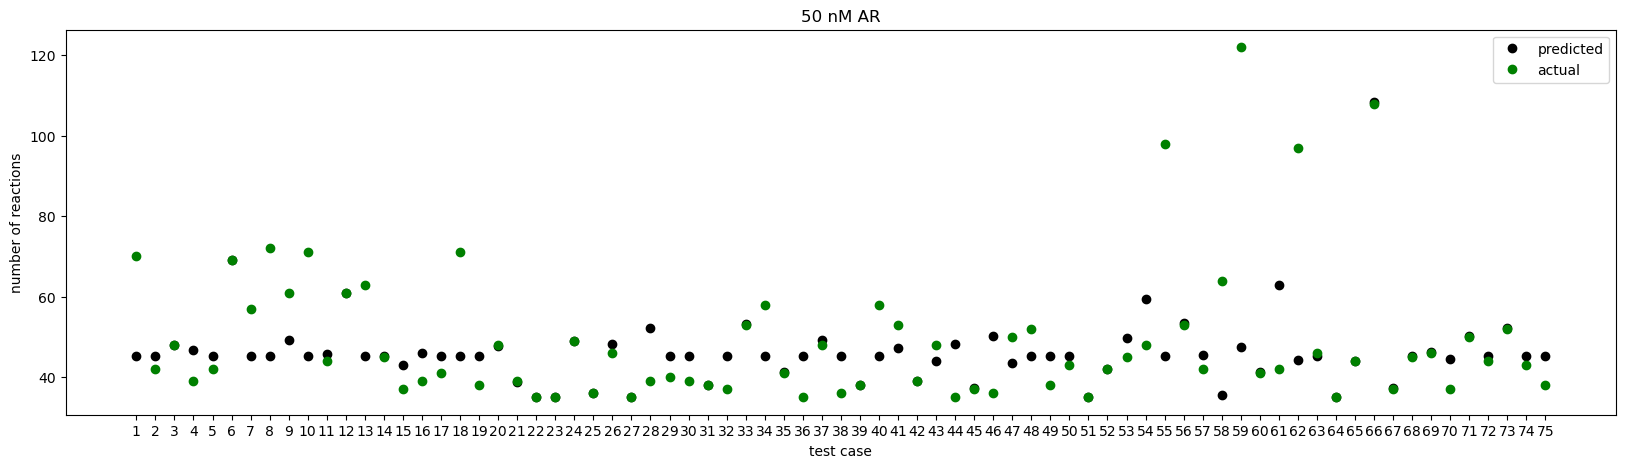

+------------------
| total number of experments: 199
| min: 0.0007781982421875
| max: 200.20367431640625
| average: 14.650646209716797
| median: 5.781917572021484
| mode: ModeResult(mode=array([3.464203], dtype=float32), count=array([6]))
| average difference: 20.66924267803665
+------------------


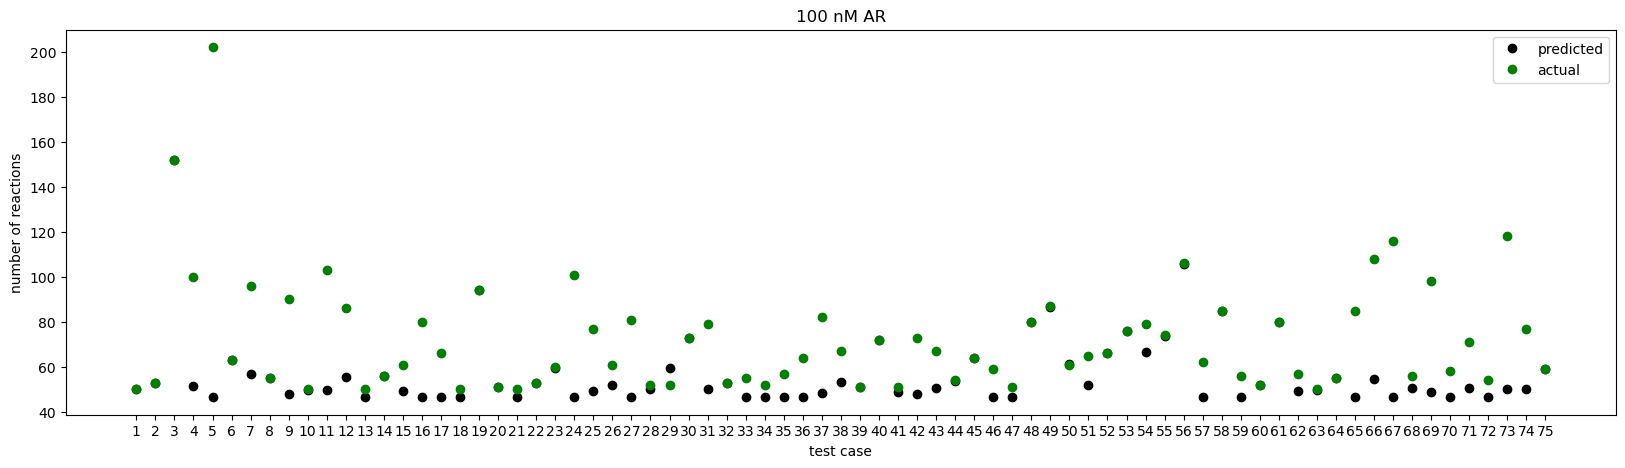

In [15]:
for k in return_dict.keys():
    outputPlot = return_dict[k]["outputPlot"][:75]
    targetPlot = return_dict[k]["targetPlot"][:75]
    diffs = []
    for i in range(len(return_dict[k]["outputPlot"])):
        diffs.append(abs(return_dict[k]["outputPlot"][i] - return_dict[k]["targetPlot"][i]))
    printStats(diffs)   
    x_marks = [i + 1 for i in list(range(len(outputPlot)))]
    plt.plot(x_marks, outputPlot, 'o', color='black', label="predicted")
    plt.plot(x_marks, targetPlot, 'o', color='green', label="actual")
    plt.xticks(ticks=x_marks, labels=x_marks)
    plt.xlabel('test case')
    plt.ylabel('number of reactions')
    title = k.split("_")
    title.pop()
    title = ' '.join(title)
    plt.title(f"{title}")
    plt.legend(loc='upper right')
    plt.show()

In [16]:
defulte_ast_node_interactivity = InteractiveShell.ast_node_interactivity
InteractiveShell.ast_node_interactivity = 'all'
InteractiveShell.ast_node_interactivity

'all'